In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For displaying Jupyter notebooks on Retina displays
%config InlineBackend.figure_format = 'retina'

In [77]:
# Load the Excel Sheet Data

xls = pd.ExcelFile('OG_Lns.xlsx')
df_e = pd.read_excel(xls, 'Elastic')
df_t = pd.read_excel(xls, 'Jim_Total')
df_i = pd.read_excel(xls, 'Jim_Inc')


In [78]:
# Extract Load and Displacement data
w = 4.53 # width (mm)

# Elastic Model (No damage)
delta_e = df_e["d_adjusted"]
P_e     = df_e["Pnorm"] #Normalized load

# Total SCA (damage) Model
delta_t = df_t["d_adjusted"]
P_t     = df_t["Pnorm"] #Normalized load

# Incremental SCA (damage) Model
delta_i = df_i["d_adjusted"]
P_i     = df_i["Pnorm"] #Normalized load


In [79]:
# Finding First Local Maxima of - Total SCA

for j in range(len(delta_t)-1):
    if P_t[j+1]<P_t[j]:
        jstar_t = j
        break;

jstar_t
    


8

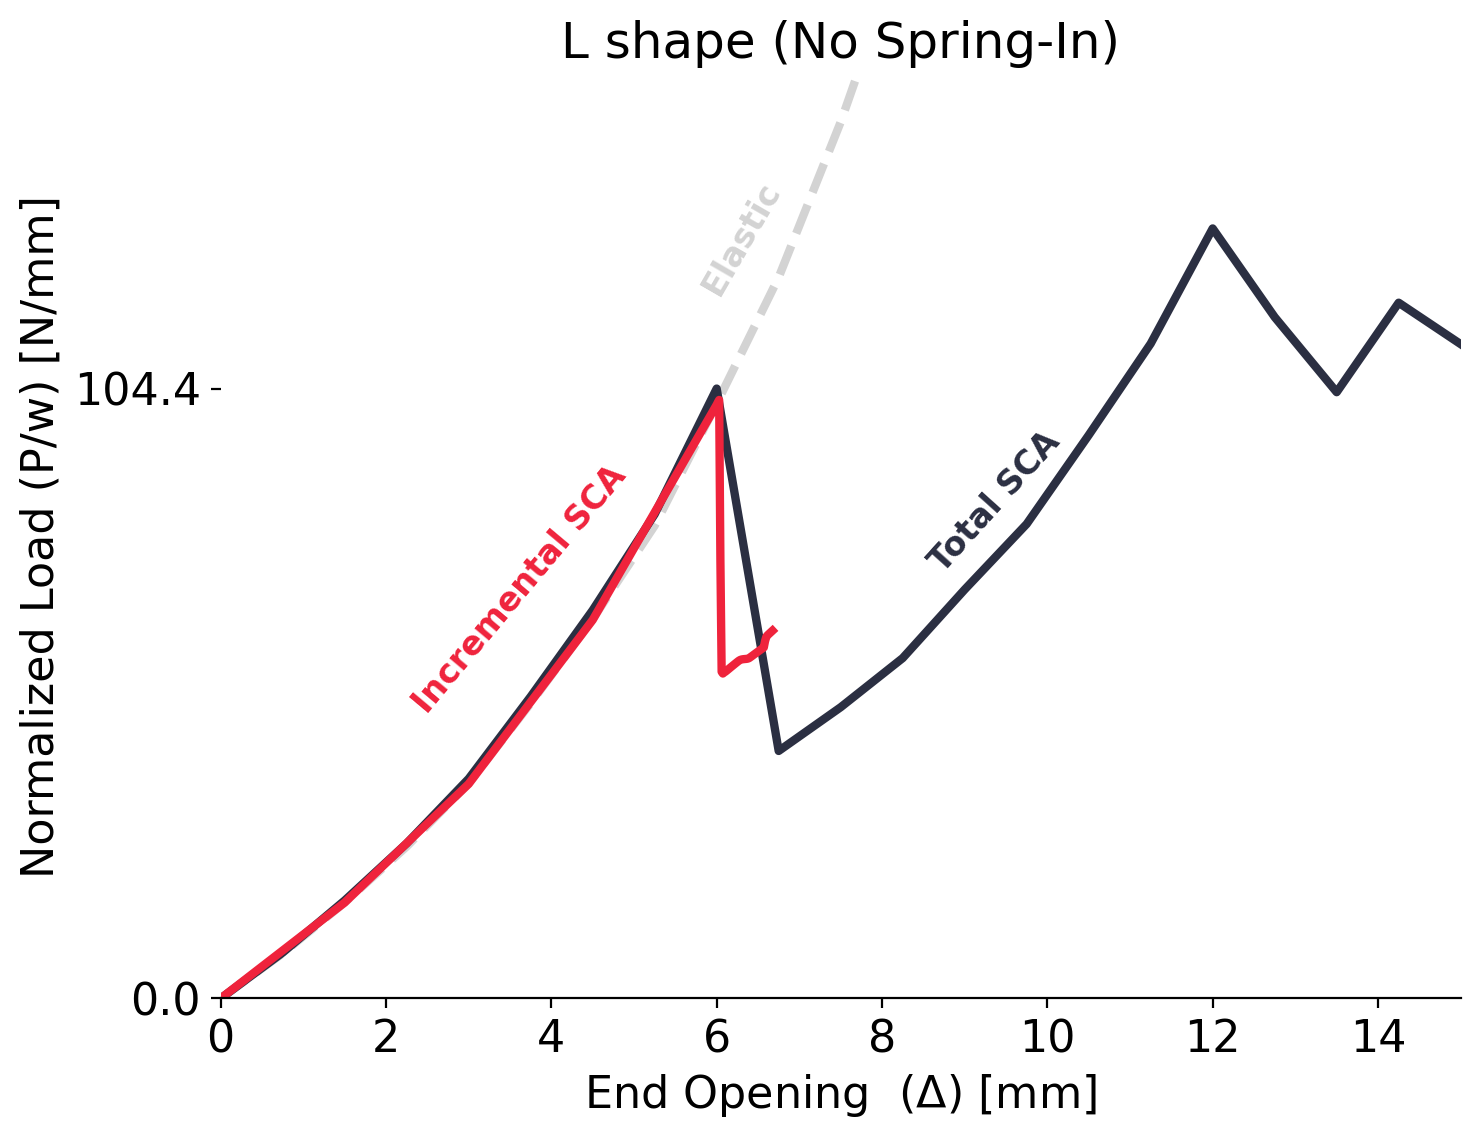

In [100]:
fig, ax = plt.subplots(figsize=(8, 6))  # This sets the figure size to 6 inches wide by 5 inches high

# -------------------BEGIN-CHANGES------------------------
# Define font sizes
SIZE_DEFAULT = 12
SIZE_LARGE = 16
plt.rc("font", family="sans-serif")      # controls default font
plt.rc("font", weight="normal")          # controls default font
plt.rc("font", size=SIZE_DEFAULT)        # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE + 2)     # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)     # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_LARGE)    # fontsize of the tick labels 
plt.rc("ytick", labelsize=SIZE_LARGE)  # fontsize of the tick labels
# --------------------END CHANGES------------------------

# Define a nice color palette:
colors = ["#2B2F42", "#EF233C"]


# Plot the baseline
ax.plot(delta_e,P_e, label="Elastic", linestyle="--",color="lightgray", linewidth=3)
ax.plot(delta_t,P_t, label="Total SCA",color=colors[0], linewidth=3)
ax.plot(delta_i,P_i, label="Incremental SCA",color=colors[1], linewidth=3)


# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

# Set y-ticks
# ax.set_yticks([0, P_t[jstar_t], 140])
ax.set_yticks([0, P_t[jstar_t]])

# Set limit values 
ax.set_xlim(0, max(delta_e))
ax.set_ylim(0, 1.2*max(P_t))


# Set labels and title
ax.set_xlabel(r"End Opening  ($\Delta$) [mm]")
ax.set_ylabel("Normalized Load (P/w) [N/mm]")
ax.set_title("L shape (No Spring-In)")
#ax.set_title("L shape (No Spring-In) - 4point Bending (IM7/8552)")


# LEGENDS
#ax.legend(frameon=False)

# Custom legends
# Elastic
ax.text(5.75,
        130,
        "Elastic",
        color="lightgray",
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
        rotation=60)

# TOTAL SCA
ax.text(8.5,
        85,
        "Total SCA",
        color=colors[0],
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
        rotation=48)

# Incremental SCA
ax.text(2.25,
        70,
        "Incremental SCA",
        color=colors[1],
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
        rotation=50)

# Save the figure/ Show the figure
plt.savefig('Lns_FvsD.png')
plt.show()

